# Exploratory Data Analysis of CrossFit Open 2019 Dataset

In [126]:
# pip install jupyterlab "ipywidgets>=7.5"
# jupyter labextension install jupyterlab-plotly@4.14.3
# jupyter labextension install @jupyter-widgets/jupyterlab-manager plotlywidget@4.14.3
# pip install squarify

# import relevant libraries

import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import math
import plotly.io as pio
from matplotlib import pyplot as plt
import squarify

import warnings

# set options
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.options.plotting.backend = "plotly"
pio.renderers.default = 'iframe' # or 'notebook' or 'colab'

In [127]:
# read clean Open 2019 dataset and drop unnamed column
df = pd.read_csv('./data/19_clean.csv')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [128]:
df.head()

,competitorid,firstname,lastname,gender,countryoforigincode,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division,rank_1,rank_2,rank_3,rank_4,rank_5,time_2,time_3,time_4,time_5,scaled_1,scaled_2,scaled_3,scaled_4,scaled_5,score_1,score_2,score_3,score_4,score_5,bs_backsquat,bs_cleanandjerk,bs_snatch,bs_deadlift,bs_fightgonebad,bs_maxpull_ups,bs_fran,bs_grace,bs_helen,bs_filthy50,bs_sprint400m,bs_run5k,w1_reps_total,w2_reps_total,w2_reps_t2b,w2_reps_du,w2_reps_sqcl,w2_rounds_completed,w2_tiebreak,w3_reps_total,w3_5ft_reps_ohl,w3_reps_dbbsu,w3_reps_hspu,w3_hspu_status,w3_5ft_reps_hsw,w3_rounds_completed,w3_tiebreak,w4_reps_total,w4_reps_sn,w4_reps_bp,w4_reps_bmu,w4_bmu_status,w4_tiebreak,w5_reps_total,w5_reps_thr,w5_reps_c2bpu,BMI
0,86,Justin,Bergh,M,US,CrossFit HQ,37.0,1.96,102.06,53022,304948,0,Men,15232,58534,59298,85576,86308,480.0,600.0,720.0,1200.0,0,0,0,0,0,13040000,11670764,10980237,10720255,11350000,151.0,120.0,95.0,188.0,393.0,32.0,226.0,174.0,496.0,1287.0,64.0,1325.0,304.0,167.0,50.0,100.0,17.0,1.88,436.0,98.0,40.0,50.0,8.0,1.0,0.0,2.16,363.0,72.0,30.0,36.0,6.0,1.0,465.0,135.0,75.0,60.0,26.6
1,88,Cary,Hair,M,US,CrossFit Santa Cruz,34.0,1.83,86.64,4361,37192,0,Men,5891,5456,7199,13060,5586,720.0,600.0,720.0,882.0,0,0,0,0,0,13240000,12620599,11330328,11170505,12100318,206.0,142.0,120.0,234.0,407.0,54.0,140.0,109.0,448.0,1103.0,54.0,1294.0,324.0,262.0,75.0,150.0,37.0,2.98,601.0,133.0,40.0,50.0,43.0,1.0,0.0,2.86,NaN,117.0,30.0,60.0,27.0,1.0,215.0,210.0,105.0,105.0,25.9
2,92,Tim,Chan,M,US,CrossFit SoCal,49.0,1.68,73.03,117405,564929,0,Men,155079,102548,127946,76177,103179,480.0,600.0,720.0,1200.0,0,0,0,0,0,11710000,11021027,10510000,10770250,11090000,102.0,92.0,70.0,138.0,NaN,35.0,262.0,281.0,645.0,1661.0,NaN,NaN,171.0,102.0,37.0,50.0,15.0,1.14,173.0,51.0,40.0,11.0,0.0,0.0,0.0,1.22,600.0,77.0,30.0,37.0,10.0,1.0,470.0,109.0,60.0,49.0,25.9
3,93,Leif,Edmundson,M,US,CrossFit HQ,37.0,1.83,92.99,38765,237798,0,Men,50223,39468,78855,40425,28827,480.0,600.0,720.0,1200.0,0,0,0,0,0,12670000,11720803,10920171,10970472,12010000,138.0,106.0,83.0,161.0,403.0,45.0,220.0,154.0,493.0,1500.0,62.0,1239.0,267.0,172.0,50.0,100.0,22.0,1.93,397.0,92.0,40.0,50.0,2.0,1.0,0.0,2.04,429.0,97.0,30.0,48.0,19.0,1.0,248.0,201.0,105.0,96.0,27.8
4,1617,John,Mclaughlin,M,US,CrossFit Palm Beach,51.0,1.78,84.82,12050,89855,0,Men,12686,26138,26923,13629,10479,480.0,600.0,720.0,999.0,0,0,0,0,0,13080000,11760858,11130242,11170482,12100201,161.0,115.0,88.0,197.0,NaN,50.0,146.0,154.0,444.0,NaN,NaN,NaN,308.0,176.0,50.0,100.0,26.0,1.98,342.0,113.0,40.0,50.0,23.0,1.0,0.0,2.46,358.0,117.0,30.0,60.0,27.0,1.0,238.0,210.0,105.0,105.0,26.8


In [129]:
df.shape

(338538, 69)

---
## Workout Descriptions

### 19.1

AMRAP'15: 19 Wallball Shots / 19 Calories Row

Rx:
* Men: 20lb medball to 10ft target
* Women: 14lb medball to 9ft target

Scaling:
* Men: 14lb medball to 10ft target
* Women: 10lb medball to 9ft target

Score: total number of reps/cals

### 19.2

For time (time cap '20):
* AMRAP'8: 25 T2B / 50 DU / 15 Squat-Clean / 25 T2B / 50 DU / 13 Squat-Clean
* AMRAP'4 (if completed before 8 minutes): 25 T2B / 50 DU / 11 Squat-Clean
* AMRAP'4 (if completed before 12 minutes): 25 T2B / 50 DU / 9 Squat-Clean
* AMRAP'4 (if completed before 16 minutes): 25 T2B / 50 DU / 7 Squat-Clean

Rx:
* Men: Squat-Clean ladder 135-185-225-275-315 lb
* Women: Squat-Clean ladder 85-115-145-175-205 lb

Scaling:

Men:
* Squat-Clean ladder 95-115-135-155-185 lb
* Hanging Knee Raises instead of Toes-2-Bar
* Single Unders instead of Double Unders

Women:
* Squat-Clean ladder 55-75-95-115-135 lb
* Hanging Knee Raises instead of Toes-2-Bar
* Single Unders instead of Double Unders

Score: total number of reps / time for finishing the whole workout

### 19.3

For time (time cap '10):
* 200ft dumbbell overhead lunges
* 50 dumbbell box step-ups
* 50 strict handstand push-ups
* 200ft handstand walk

Rx:
* Men: 50lb dumbbell & 24in box
* Women: 35lb dumbbell & 20in box

Scaling (Men and Women):
* front rack lunges instead of overhead lunges
* 5in elevated strict handstand push-ups instead of no elevation
* bear crawl instead of handstand walk

Score: total number of reps / time for finishing the whole workout

### 19.4

For total time (time cap '12):
* 3 rounds of:
  - 10 snatches
  - 12 bar-facing burpees
* 3 minutes rest before continuing
* 3 rounds of:
  - 10 bar muscle-ups
  - 12 bar-facing burpees

Rx:
* Men: 95lb barbell
* Women: 65lb barbell

Scaling:
* chin-over-bar pull-ups instead of bar muscle-ups
* step over bar on the burpees is allowed
* Men: 65lb barbell
* Women: 45lb barbell

Score: total number of reps / time for finishing the whole workout

### 19.5

33-27-21-15-9 reps for time (time cap '20) of:
* thrusters
* chest-to-bar pull-ups

Rx:
* Men: 95lb barbell
* Women: 65lb barbell

Scaling:
* jumping pull-ups instead of chest-to-bar pull-ups
* Men: 65lb barbell
* Women: 45lb barbell

Score: total number of reps / time for finishing the whole workout

---
## Feature Explanation

#### personal information
* competitorid: unique identification number of an athlete
* firstname & lastname: of the athlete
* gender whether it's male (M) or female (F)
* countryoforigincode: abbreviation of an athlete's home country
* affiliatename: the name of the crossfit box an athlete belongs to
* age: age in years
* height: in meter
* weight: in kg
* BMI: body-mass-index of an athlete

#### workout information:
* overallrank is the overall rank after all workouts are taken into account
* overallscore: the score an athlete reached after all workouts
* is_scaled: classification wheter an athlete is doing the workouts in scaled or Rx variation
* division: the division an athlete belongs to (note: divisions differ from 'Men' or 'Women' only if an athlete doesn't belong to it at all)
* rank_i (1-5): the ranks of each individual workout
* time_i (2-5): the time after completing a workout
* scaled_i (1-5): classification wheter an athlete did a single workout in Rx or scaled
* score_i (1-5) the score of each individual workout
* 19.1:
  - w1_reps_total: total number of all workout repetitions
* 19.2:
  - w2_reps_total: total number of all workout repetitions
  - w2_reps_t2b: repetitions of Toes-to-Bar completed
  - w2_reps_du: repetitions of Double Unders completed
  - w2_reps_sqcl: repetitions of Squat Cleans completed
  - w2_rounds_completed: number of rounds completed (every round ends with the last Squat Clean per weight)
  - w2_tiebreak: tiebreak time after the last repetition of Double Unders
* 19.3:
  - w3_reps_total: total number of all workout repetitions
  - w3_5ft_reps_ohl: amount of 5ft distance of Walking Overhead Lunges
  - w3_reps_dbbsu: repetitions of Dumbbell Box Step-Ups
  - w3_reps_hspu: repetitions of strict Handstand Push-Ups
  - w3_hspu_status: ability to perform minimum one strict Handstand Push-Up
  - w3_5ft_reps_hsw: amount of 5ft distance of Handstand Walk
  - w3_rounds_completed: number of rounds completed (every round ends with the last repetition of an exercise)
  - w3_tiebreak: tiebreak time after final Box Step-Up or final Handstand Push-Up
* 19.4:
  - w4_reps_total: total number of all workout repetitions
  - w4_reps_sn: repetitions of Snatches
  - w4_reps_bp: repetitions of Bar-facing Burpees
  - w4_reps_bmu: repetitions of Bar Muscle-Ups
  - w4_bmu_status: ability to perform minimum one Bar Muscle-Up
  - w4_tiebreak: tiebreak time after final Burpee before first Bar Muscle-Up (there will be no tiebreak time if the workout is completed prior to the time cap
* 19.5:
  - w5_reps_total: total number of all workout repetitions
  - w5_reps_thr: repetitions of Thrusters
  - w5_reps_c2bpu: repetitions of Chest-to-Bar Pull-Ups

#### benchmark statistics
* bs_backsquat: weight in kg for 1-repetition-maximum (1RM) of Backsquat
* bs_cleanandjerk: weight in kg for 1RM of Clean&Jerk
* bs_snatch: weight in kg for 1RM of Snatch
* bs_deadlift: weight in kg for 1RM of Deadlift
* bs_fightgonebad: number of total repetitions for workout "Fight Gone Bad", consisting of 3 rounds of: 1min Wallball Shots (9/6kg) - 1min Sume Deadlift Highpulls (34/25kg) - 1min Boxjumps (51cm) - 1min Push Press (34/25kg) - 1min Rowing (calories) - 1min Rest
* bs_maxpull_ups: number of Pull-Ups in a row
* bs_fran: time in seconds for completing "Fran"-workout, consisting of 21-15-9 repetitions of Thrusters (43/30kg) and Pull-Ups
* bs_grace: time in seconds for completing "Grace"-workout, consisting of 30 Clean&Jerks (61/43kg)
* bs_helen: time in seconds for completing "Helen"-workout, consisting of 3 rounds of: 800m Run - 42 Kettlebell-Swings (24/16kg) - 24 Pull-Ups
* bs_filthy50: time in seconds for completing 50 Box Jumps (61/51cm) - 50 Jumping Pull-Ups - 50 KB-Swings (16/12kg) - 50 Steps Walking Lunges - 50 Knees-to-Ellbow - 50 Push Press (20/15kg) - 50 Back Extensions - 50 Wallball Shots (9/6kg) - 50 Burpees - 50 Double Unders
* bs_sprint400m: time in seconds for running 400m
* bs_run5k: time in seconds for running 5km

---

In [130]:
df[(df['division']=='Men') | (df['division']=='Women')]['competitorid'].count()

325632

In [131]:
# 12,906 (about 4% of competitors) do not participate in Men/Women division
# and only in another division

---

## Preparations

In [132]:
# create new feature: w2_full_rounds_completed
w2_full_rounds_completed_list = df['w2_rounds_completed'].to_list()
w2_full_rounds_completed = []
for i in w2_full_rounds_completed_list:
    if i < 2.0:
        w2_full_rounds_completed.append('<  8 min')
    elif i >= 2.0 and i < 3.0:
        w2_full_rounds_completed.append('< 12 min')
    elif i >= 3.0 and i < 4.0:
        w2_full_rounds_completed.append('< 16 min')
    elif i >= 4.0 and i < 5.0:
        w2_full_rounds_completed.append('< 20 min')
    elif i == 5.0:
        w2_full_rounds_completed.append('full WOD')
    else:
        w2_full_rounds_completed.append(np.NaN)
df['w2_full_rounds_completed'] = w2_full_rounds_completed

In [133]:
# create new feature: w3_full_rounds_completed
w3_full_rounds_completed_list = df['w3_rounds_completed'].to_list()
w3_full_rounds_completed = []
for i in w3_full_rounds_completed_list:
    if i < 1.0:
        w3_full_rounds_completed.append('OHL')
    elif i >= 1.0 and i < 2.0:
        w3_full_rounds_completed.append('Box SU')
    elif i >= 2.0 and i < 3.0:
        w3_full_rounds_completed.append('HSPU')
    elif i >= 3.0 and i < 4.0:
        w3_full_rounds_completed.append('HS-Walk')
    elif i == 4.0:
        w3_full_rounds_completed.append('full WOD')
    else:
        w3_full_rounds_completed.append(np.NaN)
df['w3_full_rounds_completed'] = w3_full_rounds_completed

In [134]:
#sns.set_style('white')
sns.set_context("talk")

In [139]:
# get the overallrank rank range for top 1% of athletes
df_ta = df[(df['division']=='Men')|(df['division']=='Women')]
ta_1 = int(0.01*df_ta.overallrank.max())
df_ta = df_ta[df_ta['overallrank']<=ta_1]

---

## Workout Balance

### 19.1

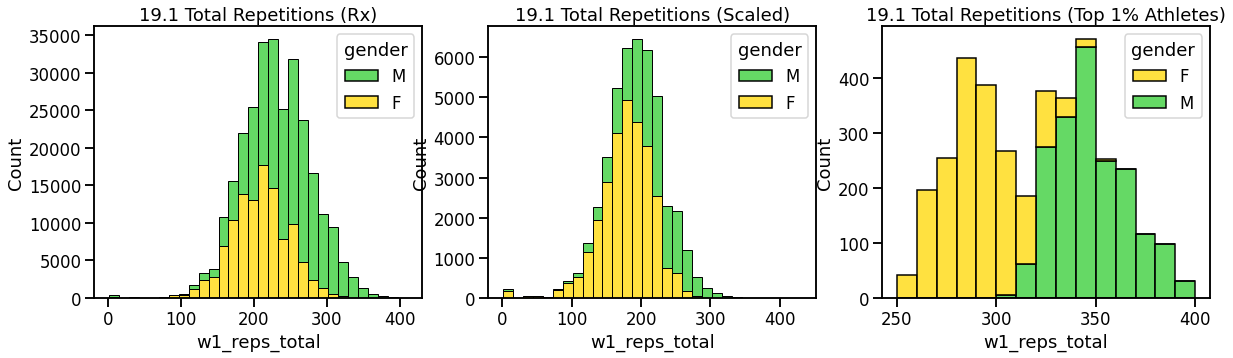

In [140]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(
    ax=axes[0],
    data=df[df['scaled_1']==0],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
).set_title('19.1 Total Repetitions (Rx)')

sns.histplot(
    ax=axes[1],
    data=df[df['scaled_1']==1],
    x='w1_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
).set_title('19.1 Total Repetitions (Scaled)');

sns.histplot(
    ax=axes[2],
    data=df_ta,
    x='w1_reps_total',
    hue='gender',
    bins=15,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
).set_title('19.1 Total Repetitions (Top 1% Athletes)');

---
### 19.2

In [137]:
fig = go.Figure()

df_m_rx = df[(df['gender']=='M') & (df['scaled_2']==0) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_rx_list),
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_rx = df[(df['gender']=='F') & (df['scaled_2']==0) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_rx_list),
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [138]:
fig = go.Figure()

df_m_sc = df[(df['gender']=='M') & (df['scaled_2']==1) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_m_sc_list = list(df_m_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_sc_list),
        sum(df_m_sc_list)-sum(df_m_sc_list[:1]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:2]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:3]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_sc = df[(df['gender']=='F') & (df['scaled_2']==1) & (df['score_2']!=0)].groupby(by='w2_full_rounds_completed').count()
df_f_sc_list = list(df_f_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_sc_list),
        sum(df_f_sc_list)-sum(df_f_sc_list[:1]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:2]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:3]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [141]:
fig = go.Figure()

df_m_1 = df_ta[df_ta['gender']=='M'].groupby(by='w2_full_rounds_completed').count()
df_m_1_list = list(df_m_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_m_1_list),
        sum(df_m_1_list)-sum(df_m_1_list[:1]),
        sum(df_m_1_list)-sum(df_m_1_list[:2]),
        sum(df_m_1_list)-sum(df_m_1_list[:3]),
        sum(df_m_1_list)-sum(df_m_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_1 = df_ta[df_ta['gender']=='F'].groupby(by='w2_full_rounds_completed').count()
df_f_1_list = list(df_f_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', ' 8 min', '12 min', '16 min', '20 min'],
    x = [
        sum(df_f_1_list),
        sum(df_f_1_list)-sum(df_f_1_list[:1]),
        sum(df_f_1_list)-sum(df_f_1_list[:2]),
        sum(df_f_1_list)-sum(df_f_1_list[:3]),
        sum(df_f_1_list)-sum(df_f_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

---
### 19.3

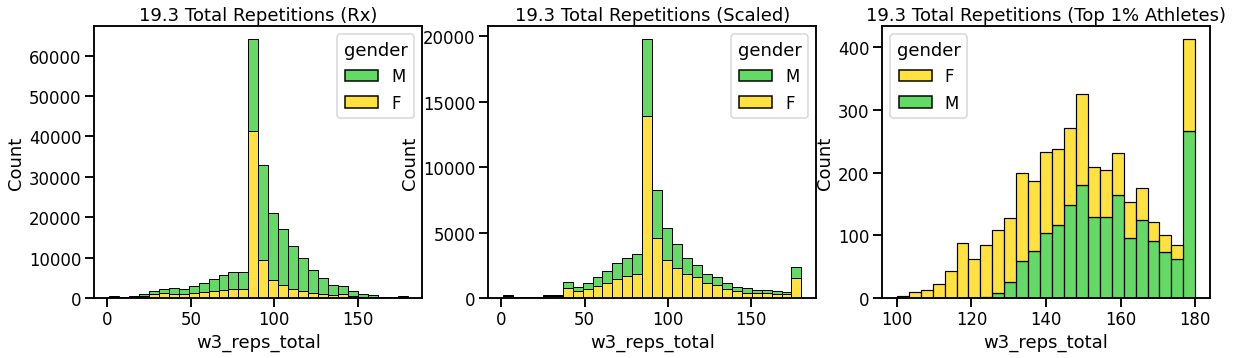

In [142]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(
    ax=axes[0],
    data=df[df['scaled_3']==0],
    x='w3_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
).set_title('19.3 Total Repetitions (Rx)')

sns.histplot(
    ax=axes[1],
    data=df[df['scaled_3']==1],
    x='w3_reps_total',
    hue='gender',
    bins=30,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
).set_title('19.3 Total Repetitions (Scaled)');

sns.histplot(
    ax=axes[2],
    data=df_ta,
    x='w3_reps_total',
    hue='gender',
    bins=25,
    multiple='stack',
    edgecolor='black',
    palette={"F": "gold", "M": "limegreen"}
).set_title('19.3 Total Repetitions (Top 1% Athletes)');

In [143]:
fig = go.Figure()

df_m_rx = df[(df['gender']=='M') & (df['scaled_3']==0) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_m_rx_list = list(df_m_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_m_rx_list),
        sum(df_m_rx_list)-sum(df_m_rx_list[:1]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:2]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:3]),
        sum(df_m_rx_list)-sum(df_m_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_rx = df[(df['gender']=='F') & (df['scaled_3']==0) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_f_rx_list = list(df_f_rx.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_f_rx_list),
        sum(df_f_rx_list)-sum(df_f_rx_list[:1]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:2]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:3]),
        sum(df_f_rx_list)-sum(df_f_rx_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [144]:
fig = go.Figure()

df_m_sc = df[(df['gender']=='M') & (df['scaled_3']==1) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_m_sc_list = list(df_m_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_m_sc_list),
        sum(df_m_sc_list)-sum(df_m_sc_list[:1]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:2]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:3]),
        sum(df_m_sc_list)-sum(df_m_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_sc = df[(df['gender']=='F') & (df['scaled_2']==1) & (df['score_3']!=0)].groupby(by='w3_full_rounds_completed').count()
df_f_sc_list = list(df_f_sc.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['start', 'OHL', 'Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_f_sc_list),
        sum(df_f_sc_list)-sum(df_f_sc_list[:1]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:2]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:3]),
        sum(df_f_sc_list)-sum(df_f_sc_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

In [146]:
fig = go.Figure()

df_m_1 = df_ta[df_ta['gender']=='M'].groupby(by='w3_full_rounds_completed').count()
df_m_1_list = list(df_m_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Men',
    y = ['Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_m_1_list),
        sum(df_m_1_list)-sum(df_m_1_list[:1]),
        sum(df_m_1_list)-sum(df_m_1_list[:2]),
        sum(df_m_1_list)-sum(df_m_1_list[:3]),
        sum(df_m_1_list)-sum(df_m_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#86CE00"}))

df_f_1 = df_ta[df_ta['gender']=='F'].groupby(by='w3_full_rounds_completed').count()
df_f_1_list = list(df_f_1.competitorid)
fig.add_trace(go.Funnel(
    name = 'Women',
    y = ['Box SU', 'HSPU', 'HS-Walk'],
    x = [
        sum(df_f_1_list),
        sum(df_f_1_list)-sum(df_f_1_list[:1]),
        sum(df_f_1_list)-sum(df_f_1_list[:2]),
        sum(df_f_1_list)-sum(df_f_1_list[:3]),
        sum(df_f_1_list)-sum(df_f_1_list[:4])
    ],
    textinfo = "value+percent initial",
    marker = {"color": "#FBE426"}))

fig.show()

---
### 19.4

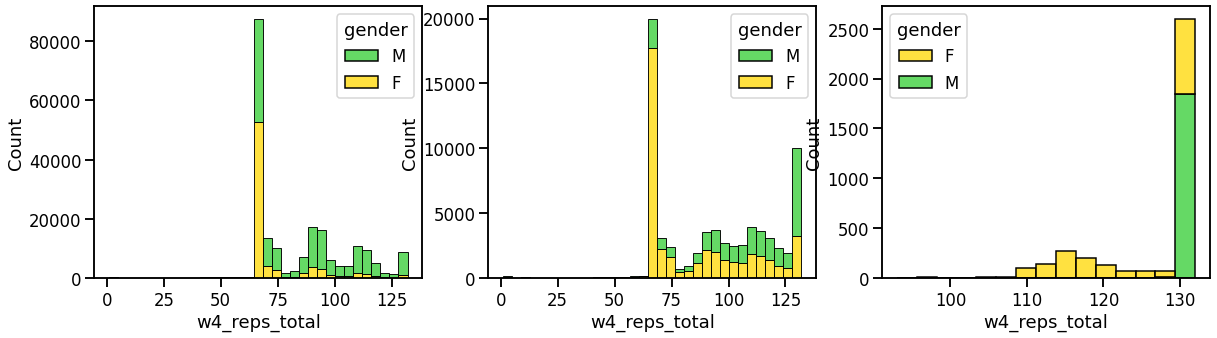

In [153]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(ax=axes[0],data=df[df['scaled_4']==0],x='w4_reps_total',hue='gender',bins=33,multiple='stack',palette={"F": "gold", "M": "limegreen"})
sns.histplot(ax=axes[1],data=df[df['scaled_4']==1],x='w4_reps_total',hue='gender',bins=33,multiple='stack',palette={"F": "gold", "M": "limegreen"})
sns.histplot(ax=axes[2],data=df_ta,x='w4_reps_total',hue='gender',bins=15,multiple='stack',palette={"F": "gold", "M": "limegreen"});

---
### 19.5

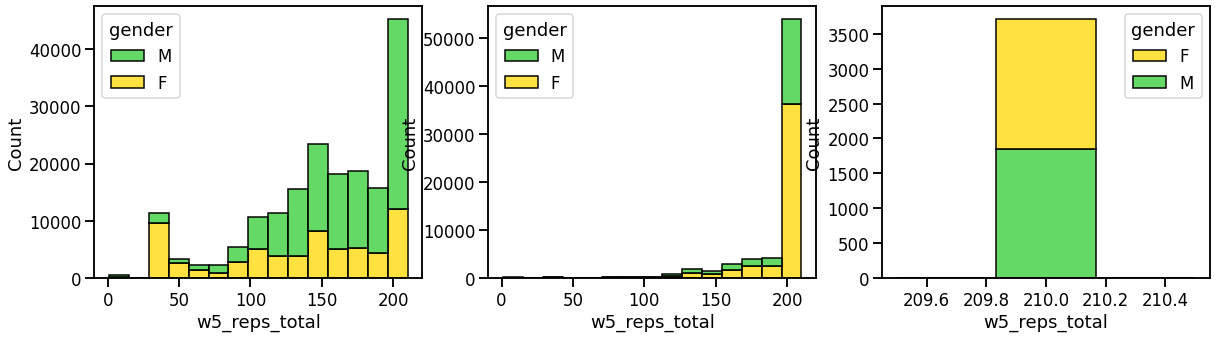

In [159]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

sns.histplot(ax=axes[0],data=df[df['scaled_5']==0],x='w5_reps_total',hue='gender',bins=15,multiple='stack',palette={"F": "gold", "M": "limegreen"})
sns.histplot(ax=axes[1],data=df[df['scaled_5']==1],x='w5_reps_total',hue='gender',bins=15,multiple='stack',palette={"F": "gold", "M": "limegreen"})
sns.histplot(ax=axes[2],data=df_ta,x='w5_reps_total',hue='gender',bins=3,multiple='stack',palette={"F": "gold", "M": "limegreen"});

---
## Important Exercises

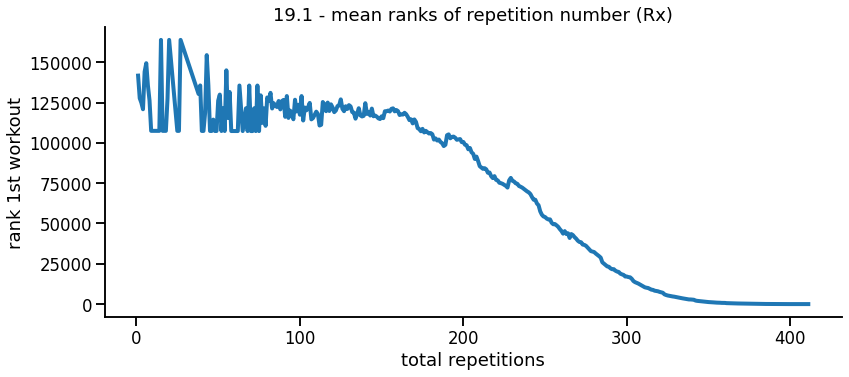

In [163]:
df_x=df[((df['division']=='Men')|(df['division']=='Women'))&(df['scaled_1']==0)]
a=list(df_x.groupby(by='w1_reps_total')['rank_1'].mean())
b=list(df_x.groupby(by='w1_reps_total')['w1_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 1st workout', title= '19.1 - mean ranks of repetition number (Rx)');

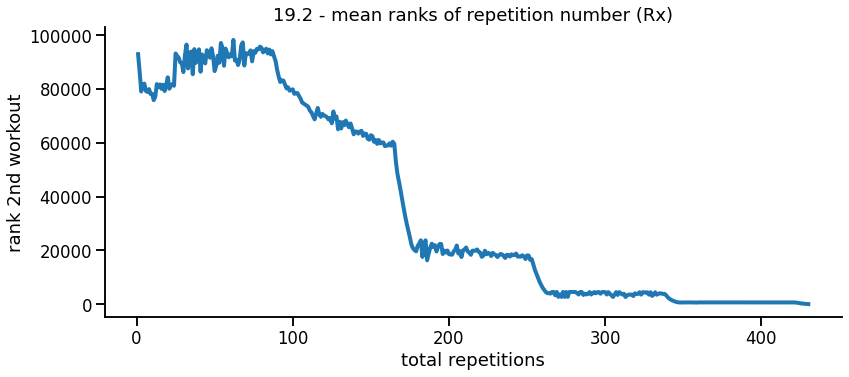

In [166]:
df_x=df[((df['division']=='Men')|(df['division']=='Women'))&(df['scaled_2']==0)]
a=list(df_x.groupby(by='w2_reps_total')['rank_2'].mean())
b=list(df_x.groupby(by='w2_reps_total')['w2_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 2nd workout', title= '19.2 - mean ranks of repetition number (Rx)');

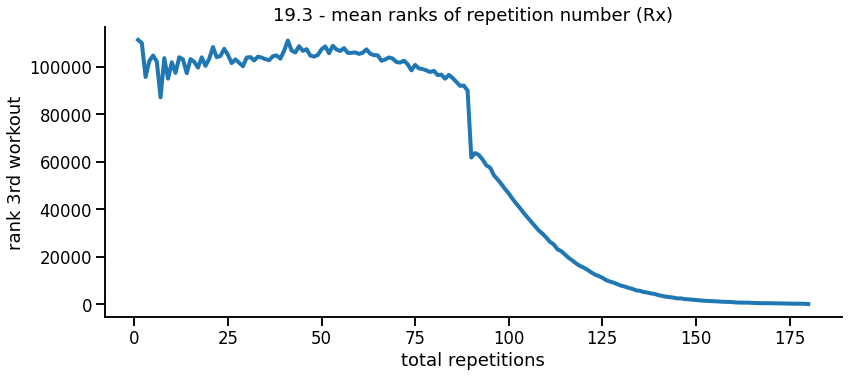

In [167]:
df_x=df[((df['division']=='Men')|(df['division']=='Women'))&(df['scaled_3']==0)]
a=list(df_x.groupby(by='w3_reps_total')['rank_3'].mean())
b=list(df_x.groupby(by='w3_reps_total')['w3_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 3rd workout', title= '19.3 - mean ranks of repetition number (Rx)');

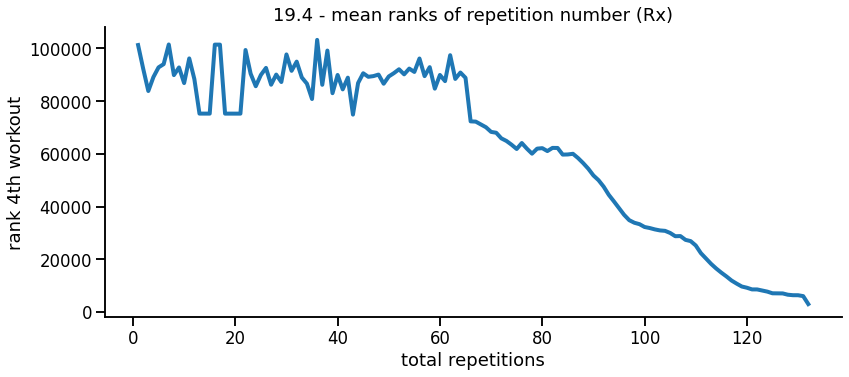

In [168]:
df_x=df[((df['division']=='Men')|(df['division']=='Women'))&(df['scaled_4']==0)]
a=list(df_x.groupby(by='w4_reps_total')['rank_4'].mean())
b=list(df_x.groupby(by='w4_reps_total')['w4_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 4th workout', title= '19.4 - mean ranks of repetition number (Rx)');

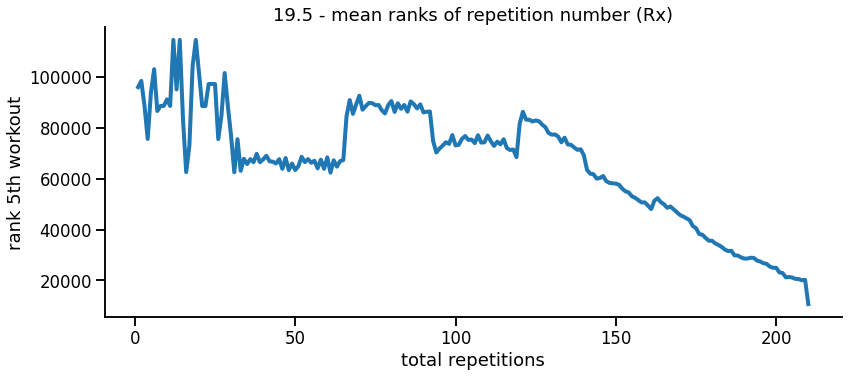

In [169]:
df_x=df[((df['division']=='Men')|(df['division']=='Women'))&(df['scaled_5']==0)]
a=list(df_x.groupby(by='w5_reps_total')['rank_5'].mean())
b=list(df_x.groupby(by='w5_reps_total')['w5_reps_total'])
c=[]
for i in b:
    c.append(i[0])
g = sns.relplot(x=c, y=a, kind="line",linewidth=4)
g.fig.set_size_inches(15,5)
g.set(xlabel='total repetitions', ylabel='rank 5th workout', title= '19.5 - mean ranks of repetition number (Rx)');

---